# Kevin Oakley's       BIOF509       Spring 2019      Final Project

### Predicting Bee trends from USDA census data 

In [ ]:
## Store USDA csv files in GitHub repo in the next cell

https://github.com/ContoakleyK/BIOF509-Bee-Trends.git

In [1]:
### Import packages to pull csv file from repo for analysis

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import requests
from urllib.request import urlretrieve

### This was the original query for a dataset from the USDA website.  Don't use this file!!

In [ ]:
### Assign URL to variable: url
url = 'https://raw.githubusercontent.com/ContoakleyK/BIOF509-Bee-Trends/master/USDA%20Honey%20Bee%20Colony%20Data.csv'

In [ ]:
### Apply pandas package to read the .csv file: url
df = pd.read_csv(url)

In [ ]:
print(df.shape)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
print(df.describe())

In [ ]:
print(df.info())

# Import dataset from USDA "Honey" query

In [2]:
### read in the smaller dataset of only Commodity = 'Honey' query
Honey_url = 'https://raw.githubusercontent.com/ContoakleyK/BIOF509-Bee-Trends/master/USDA%20Honey%20Data.csv'
honey_df = pd.read_csv(Honey_url)
print(honey_df.shape)

honey_df.info()

(45703, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45703 entries, 0 to 45702
Data columns (total 21 columns):
Program             45703 non-null object
Year                45703 non-null int64
Period              45703 non-null object
Week Ending         0 non-null float64
Geo Level           45703 non-null object
State               45703 non-null object
State ANSI          44952 non-null float64
Ag District         30394 non-null object
Ag District Code    30394 non-null float64
County              30394 non-null object
County ANSI         30359 non-null float64
Zip Code            0 non-null float64
Region              0 non-null float64
watershed_code      45703 non-null int64
Watershed           0 non-null float64
Commodity           45703 non-null object
Data Item           45703 non-null object
Domain              45703 non-null object
Domain Category     45703 non-null object
Value               45703 non-null object
CV (%)              14001 non-null object
dtypes: 

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,9,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
honey_df.head(5)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2012,YEAR,NaN,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,...,NaN,NaN,0,NaN,HONEY,HONEY - OPERATIONS WITH PRODUCTION,TOTAL,NOT SPECIFIED,6,33.8
1,CENSUS,2012,YEAR,NaN,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,...,NaN,NaN,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,5,32.9
2,CENSUS,2012,YEAR,NaN,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,...,NaN,NaN,0,NaN,HONEY,"HONEY - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"15,000",13.6
3,CENSUS,2012,YEAR,NaN,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,ELMORE,...,NaN,NaN,0,NaN,HONEY,HONEY - OPERATIONS WITH PRODUCTION,TOTAL,NOT SPECIFIED,15,33.8
4,CENSUS,2012,YEAR,NaN,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,ELMORE,...,NaN,NaN,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,13,32.9


In [4]:
# check for any duplicated data 
dups = honey_df.duplicated()
print(dups.describe())

# no duplicated entries

count     45703
unique        1
top       False
freq      45703
dtype: object


In [5]:
# look into the DtypeWarning for Columns (7,9,20)
dt_warn = honey_df.take([7,9,20], axis=1)
dt_warn

,Ag District,County,CV (%)
0,BLACK BELT,AUTAUGA,33.8
1,BLACK BELT,AUTAUGA,32.9
2,BLACK BELT,AUTAUGA,13.6
3,BLACK BELT,ELMORE,33.8
4,BLACK BELT,ELMORE,32.9
5,BLACK BELT,ELMORE,13.6
6,BLACK BELT,GREENE,33.8
7,BLACK BELT,GREENE,32.9
8,BLACK BELT,GREENE,13.6
9,BLACK BELT,LOWNDES,33.8


In [6]:
# explore these columns
print(dt_warn.describe())
print(dt_warn.info())

       Ag District      County CV (%)
count        30394       30394  14001
unique          86        1694    369
top        CENTRAL  WASHINGTON    (D)
freq          3571         356   1871
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45703 entries, 0 to 45702
Data columns (total 3 columns):
Ag District    30394 non-null object
County         30394 non-null object
CV (%)         14001 non-null object
dtypes: object(3)
memory usage: 1.0+ MB
None


In [7]:
# look for missing data in these columns
print(dt_warn.isnull().sum())

Ag District    15309
County         15309
CV (%)         31702
dtype: int64


In [8]:
# subset the dataset around these columns
hon_subset = honey_df[dt_warn.notnull()]
print(hon_subset.shape)

(45703, 21)


In [9]:
# hon is the list (np.ndarray) of column 'Commodity' to prove that the query returned only data with commodity "Honey"
hon = honey_df['Commodity'].unique()
print(hon)
print(hon.shape)

['HONEY']
(1,)


In [10]:
# lsdi is the list (np.ndarray) of column 'Data Item' to see the various sub-categories of the commodity "Honey" from my query search 
lsdi = honey_df['Data Item'].unique()
print(lsdi)
print(lsdi.shape)

['HONEY - OPERATIONS WITH PRODUCTION' 'HONEY - OPERATIONS WITH SALES'
 'HONEY - SALES, MEASURED IN $'
 'HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY'
 'HONEY, BEE COLONIES - OPERATIONS WITH SALES'
 'HONEY, BEE COLONIES - SALES, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - ADDED & REPLACED, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY DISEASE - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY PESTS ((EXCL VARROA MITES)) - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSES -

In [11]:
# years is the numpy.ndarray for the unique entries of year associated throughout the honey_df DataFrame
years = honey_df['Year'].unique()
print(years)
print(years.shape)

[2012 2007 2002 1997 2018 2017 2016 2015 2014 2013 2011 2010 2009 2008
 2006 2005 2004 2003 2001 2000 1999 1998 1996 1995 1994 1993 1992 1991
 1990 1989 1988 1987]
(32,)


In [12]:
# period is the np.ndarray of time designations for entries
period = honey_df['Period'].unique()
print(period)
print(period.shape)

['YEAR' 'END OF DEC' 'FIRST OF JAN' 'JAN THRU MAR' 'APR THRU JUN'
 'FIRST OF APR' 'MARKETING YEAR' 'FIRST OF JUL' 'JUL THRU SEP'
 'FIRST OF OCT' 'OCT THRU DEC' 'MID DEC']
(12,)


In [13]:
# census is the np.ndarray for the 'census' and 'survey' designations of the 'Program' column
census = honey_df['Program'].unique()
print(census)
print(census.shape)

['CENSUS' 'SURVEY']
(2,)


In [14]:
# Use Pandas to encode us values as 1 and others as 0
honey_df['cs_enc'] = honey_df['Program'].apply(lambda val: 1 if val == 'CENSUS' else 0)

# Print the number of unique type values
print(len(honey_df['CENSUS'].unique()))

# Create a one-hot encoded set of the Program values
cen_sur_set = pd.get_dummies(honey_df['Program'])

# Concatenate this set back to the honey_df DataFrame
honey_df = pd.concat([honey_df, cen_sur_set], axis=1)

KeyError: 'CENSUS'

In [15]:
# state is the numpy.ndarray for the States represented throughout the honey_df DataFrame.  Notice entries for "US TOTAL" and "OTHER STATES"
state = honey_df['State'].unique()
print(state)
print(state.shape)

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS'
 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA'
 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING'
 'US TOTAL' 'OTHER STATES']
(52,)


In [16]:
# sansi is the numpy.ndarray for the American National Standards Institute. ANSI codes are a standardized set of numeric or alphabetic codes issued by the American National Standards Institute (ANSI) to ensure uniform identification of geographic entities through all federal government agencies. These standards replace the Federal Information Processing Standards (FIPS) codes previously issued by the National Institute of Standards and Technology (NIST). See http://www.census.gov/geo/www/ansi/ for more information.
sansi = honey_df['State ANSI'].unique()
print(sansi)
print(sansi.shape)

[ 1.  2.  4.  5.  6.  8.  9. 10. 12. 13. 15. 16. 17. 18. 19. 20. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. nan]
(51,)


In [17]:
# ag_dist is the numpy.ndarray for the Agricultural Districts represented throughout the honey_df DataFrame.  
ag_dist = honey_df['Ag District'].unique()
print(ag_dist)
print(ag_dist.shape)

['BLACK BELT' 'COASTAL PLAINS & GULF COAST' 'MOUNTAINS & EASTERN VALLEY'
 'NORTHERN VALLEY' 'UPPER PLAINS & PIEDMONT' 'WIREGRASS' 'KENAI PENINSULA'
 'MATANUSKA-SUSITNA-ANCHORAGE' 'TANANA VALLEY' 'NORTHERN' 'SOUTHERN'
 'CENTRAL' 'EAST CENTRAL' 'NORTH CENTRAL' 'NORTHEAST' 'NORTHWEST'
 'SOUTH CENTRAL' 'SOUTHEAST' 'SOUTHWEST' 'WEST CENTRAL' 'CENTRAL COAST'
 'NORTHERN COAST' 'SACRAMENTO VALLEY' 'SAN JOAQUIN VALLEY'
 'SIERRA MOUNTAINS' 'SISKIYOU-SHASTA' 'SOUTHERN CALIFORNIA'
 'NORTHWEST AND MOUNTAIN' 'SAN LUIS VALLEY' 'ALL COUNTIES' 'HAWAII ISLAND'
 'KAUAI AND NIIHAU ISLANDS' 'MAUI, MOLOKAI & LANAI ISLAND' 'OAHU ISLAND'
 'EAST' 'NORTH' 'EAST SOUTHEAST' 'WEST' 'WEST SOUTHWEST' 'BLUEGRASS'
 'EASTERN OR MOUNTAIN' 'MIDWESTERN' 'PURCHASE' 'SOUTH'
 'LOWER EASTERN SHORE' 'UPPER EASTERN SHORE' 'WESTERN' 'UPPER PENINSULA'
 'LOWER DELTA' 'SOUTHEAST AND COASTAL' 'UPPER DELTA' 'EASTERN'
 'LONG ISLAND' 'CENTRAL COASTAL' 'CENTRAL PIEDMONT' 'NORTHERN COASTAL'
 'NORTHERN MOUNTAIN' 'NORTHERN PIEDMONT' 'SOUTH

In [18]:
# ag_dist_cd is the numpy.ndarray for the Agricultural District Codes represented throughout the honey_df DataFrame.  
ag_dist_cd = honey_df['Ag District Code'].unique()
print(ag_dist_cd)
print(ag_dist_cd.shape)

[40. 50. 20. 10. 30. 60. 80. 90. 70. 51. 11. 24. 35. 62. 91. 82. 52. 97.
 21. 81. 96. 22. nan 12.]
(24,)


In [19]:
# county is the numpy.ndarray for the Counties represented throughout the honey_df DataFrame.
county = honey_df['County'].unique()
print(county)
print(county.shape)

['AUTAUGA' 'ELMORE' 'GREENE' ... 'HANSFORD' 'LAMB' 'PECOS']
(1695,)


In [20]:
# cansi is the numpy.ndarray for the Countie ANSI codes represented throughout the honey_df DataFrame.
cansi = honey_df['County ANSI'].unique()
print(cansi)
print(cansi.shape)

[  1.  51.  63.  85.  87.  91. 105. 119.   3.  13.  23.  25.  35.  53.
  97.  99. 129.   9.  15.  19.  29.  43.  49.  55.  71.  95. 115.  33.
  59.  77.  79.  83.  89.  93. 103. 133.   7.  17.  21.  27.  37.  57.
  73.  75.  81. 107. 111. 117. 121. 123. 125. 127.   5.  31.  39.  41.
  45.  61.  67.  69. 109. 113.  nan  12. 147.  65. 135. 137. 141. 145.
 143.  47. 131. 149.  11. 101.  86. 153. 159. 167. 169. 175. 207. 209.
 211. 217. 225. 235. 237. 247. 265. 163. 189. 251. 139. 157. 187. 219.
 227. 281. 291. 297. 311. 181. 195. 221. 241. 257. 317. 213. 223. 233.
 295. 313. 155. 161. 173. 185. 271. 277. 287. 321. 179. 183. 229. 267.
 299. 305. 177. 201. 205. 243. 253. 261. 273. 151. 171. 197. 199. 231.
 255. 263. 269. 285. 293. 203. 191. 193. 165. 215. 239. 186. 510. 309.
 331. 349. 397. 439. 491. 409. 333. 337. 363. 367. 425. 497. 315. 343.
 347. 365. 379. 387. 401. 419. 423. 449. 459. 467. 499. 289. 339. 351.
 373. 395. 403. 407. 455. 457. 471. 473. 411. 451. 463. 485. 325. 453.
 477. 

In [21]:
# wash_cd is the numpy.ndarray for the Watershed Code represented throughout the honey_df DataFrame. Seems uninformative
wash_cd = honey_df['watershed_code'].unique()
print(wash_cd)
print(wash_cd.shape)

[0]
(1,)


In [22]:
# domain is the list (np.ndarray) of column 'Domain' to see the various sub-categories
domain = honey_df['Domain'].unique()
print(domain)
print(domain.shape)

['TOTAL' 'OPERATORS' 'OPERATORS, PRINCIPAL' 'INVENTORY OF BEE COLONIES']
(4,)


In [23]:
# get more information about the 4 different labels in the Domain column
print(honey_df['Domain'].describe())  # This shows that 44853 of the 45703 entries are 'TOTAL'

inv_beeC = honey_df['Domain'] == 'INVENTORY OF BEE COLONIES'
print(inv_beeC.describe())  # this tells me that only 102 entries are True for 'INVENTORY OF BEE COLONIES'

oper = honey_df['Domain'] == 'OPERATORS'
print(oper.describe())  # this tells me that only 454 entries are True for 'OPERATORS'

oper_prin = honey_df['Domain'] == 'OPERATORS, PRINCIPAL'
print(oper_prin.describe())  # this tells me that only 294 entries are True for 'OPERATORS, PRINCIPAL'

count     45703
unique        4
top       TOTAL
freq      44853
Name: Domain, dtype: object
count     45703
unique        2
top       False
freq      45601
Name: Domain, dtype: object
count     45703
unique        2
top       False
freq      45249
Name: Domain, dtype: object
count     45703
unique        2
top       False
freq      45409
Name: Domain, dtype: object


In [24]:
# try encoding the labels of the Domain column with scikit-learn's LabelEncoder method to do that transformation.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(honey_df['Domain'])

list(le.classes_)

le.transform(['INVENTORY OF BEE COLONIES', 'OPERATORS', 'OPERATORS, PRINCIPAL', 'TOTAL']) 


array([0, 1, 2, 3])

In [25]:
# fit and transform the previous cell and compare to the original column
honey_df['Domain_enc'] = le.fit_transform(honey_df['Domain'])
print(honey_df[['Domain_enc','Domain']].head())

# explore this new column
print(honey_df.shape)

print(honey_df[['Domain_enc']].describe())
print(honey_df[['Domain_enc']].info())


   Domain_enc Domain
0           3  TOTAL
1           3  TOTAL
2           3  TOTAL
3           3  TOTAL
4           3  TOTAL
(45703, 23)
         Domain_enc
count  45703.000000
mean       2.967004
std        0.255277
min        0.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        3.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45703 entries, 0 to 45702
Data columns (total 1 columns):
Domain_enc    45703 non-null int64
dtypes: int64(1)
memory usage: 357.1 KB
None


In [84]:
# just curious, drop all rows not equal to 'INVENTORY OF BEE COLONIES'.  See what data this leaves you to play with.
# step 1 - create boolean Series
criteria = honey_df['Domain'] == 'INVENTORY OF BEE COLONIES'
# step 2 - do boolean selection
honey_df[criteria].head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Data Item,Domain,Domain Category,Value,CV (%),cs_enc,Domain_enc,State_ANSI_log,Ag_Dist_Code_log,CANSI_log
32695,SURVEY,2017,MARKETING YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,"HONEY - INVENTORY, MEASURED IN COLONIES",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),"20,000",NaN,0,0,NaN,NaN,NaN
32697,SURVEY,2017,MARKETING YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,"HONEY - PRODUCTION, MEASURED IN LB / COLONY",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),30,NaN,0,0,NaN,NaN,NaN
32700,SURVEY,2017,MARKETING YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,"HONEY, CONTRACTING HIVES FOR POLLINATION - GRO...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),(S),NaN,0,0,NaN,NaN,NaN
32827,SURVEY,2017,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),"6,000",NaN,0,0,NaN,NaN,NaN
32828,SURVEY,2017,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,"HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),0,NaN,0,0,NaN,NaN,NaN


In [27]:
# explore new subset of criteria data
honey_df[criteria].describe()

# This subset only contains data for 3 years (2015-2017) and appears to only contain survey reports from US Totals at the National level

,Year,Week Ending,State ANSI,Ag District Code,County ANSI,Zip Code,Region,watershed_code,Watershed,cs_enc,Domain_enc
count,102.000000,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,102.0,102.0
mean,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
std,0.820529,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
min,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
25%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
50%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
max,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0


In [28]:
print(honey_df[criteria].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 32695 to 40043
Data columns (total 23 columns):
Program             102 non-null object
Year                102 non-null int64
Period              102 non-null object
Week Ending         0 non-null float64
Geo Level           102 non-null object
State               102 non-null object
State ANSI          0 non-null float64
Ag District         0 non-null object
Ag District Code    0 non-null float64
County              0 non-null object
County ANSI         0 non-null float64
Zip Code            0 non-null float64
Region              0 non-null float64
watershed_code      102 non-null int64
Watershed           0 non-null float64
Commodity           102 non-null object
Data Item           102 non-null object
Domain              102 non-null object
Domain Category     102 non-null object
Value               102 non-null object
CV (%)              0 non-null object
cs_enc              102 non-null int64
Domain_enc          102 n

In [42]:
# take the informative columns and pivot to the Data Item column
crit_piv = honey_df[criteria].take([1,2,15,16,17,18,19,22], axis=1)
print(crit_piv.head())


       Year          Period Commodity  \
32695  2017  MARKETING YEAR     HONEY   
32697  2017  MARKETING YEAR     HONEY   
32700  2017  MARKETING YEAR     HONEY   
32827  2017            YEAR     HONEY   
32828  2017            YEAR     HONEY   

                                               Data Item  \
32695            HONEY - INVENTORY, MEASURED IN COLONIES   
32697        HONEY - PRODUCTION, MEASURED IN LB / COLONY   
32700  HONEY, CONTRACTING HIVES FOR POLLINATION - GRO...   
32827  HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...   
32828  HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...   

                          Domain  \
32695  INVENTORY OF BEE COLONIES   
32697  INVENTORY OF BEE COLONIES   
32700  INVENTORY OF BEE COLONIES   
32827  INVENTORY OF BEE COLONIES   
32828  INVENTORY OF BEE COLONIES   

                                         Domain Category   Value  Domain_enc  
32695  INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES)  20,000           0  
32697  INVENTORY 

In [48]:
# reindex crit_piv by Data Item column
crit_piv.reindex(['Data Item'])
crit_piv


,Year,Period,Commodity,Data Item,Domain,Domain Category,Value,Domain_enc
32695,2017,MARKETING YEAR,HONEY,"HONEY - INVENTORY, MEASURED IN COLONIES",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),"20,000",0
32697,2017,MARKETING YEAR,HONEY,"HONEY - PRODUCTION, MEASURED IN LB / COLONY",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),30,0
32700,2017,MARKETING YEAR,HONEY,"HONEY, CONTRACTING HIVES FOR POLLINATION - GRO...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),(S),0
32827,2017,YEAR,HONEY,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),"6,000",0
32828,2017,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY DISEASE - INV...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),0,0
32829,2017,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES ...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),13,0
32830,2017,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - ...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),5,0
32831,2017,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY PESTS (EXCL V...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),18.2,0
32832,2017,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSE...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),22.2,0
32833,2017,YEAR,HONEY,"HONEY, BEE COLONIES, AFFECTED BY VARROA MITES ...",INVENTORY OF BEE COLONIES,INVENTORY OF BEE COLONIES: (LESS THAN 5 COLONIES),26.3,0


In [51]:
# di is the list (np.ndarray) of column 'Data Item' to see the various sub-categories
di = crit_piv['Data Item'].unique()
print(di)
print(di.shape)

['HONEY - INVENTORY, MEASURED IN COLONIES'
 'HONEY - PRODUCTION, MEASURED IN LB / COLONY'
 'HONEY, CONTRACTING HIVES FOR POLLINATION - GROSS INCOME, MEASURED IN $'
 'HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DISORDER, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY DISEASE - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY OTHER CAUSES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY PESTICIDES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY PESTS (EXCL VARROA MITES) - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY UNKNOWN CAUSES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES, AFFECTED BY VARROA MITES - INVENTORY, MEASURED IN PCT OF COLONIES'
 'HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - ADDED & REPLACED, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED IN COLONIES'
 'HONEY, BEE COLONIES - LOSS

In [52]:
# perd is the list (np.ndarray) of column 'Period' to see the various sub-categories
perd = crit_piv['Period'].unique()
print(perd)
print(perd.shape)

['MARKETING YEAR' 'YEAR' 'FIRST OF JAN' 'JAN THRU MAR' 'APR THRU JUN'
 'FIRST OF APR' 'FIRST OF JUL' 'JUL THRU SEP' 'FIRST OF OCT'
 'OCT THRU DEC']
(10,)


In [ ]:
# this code doesn't work becuase there are duplicates in the index; disregard
# pivoted = crit_piv.pivot(index='Data Item', columns='Year') 
# print(pivoted)

In [49]:
# looks like the dataset consists of only [State]='US TOTAL' from 2015 & 2017 that have the same 'Domain' & 'Domain Category' identities. The 'Data Item' and 'Value' columns vary
bcol_dead = honey_df['Data Item'] == 'HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED IN COLONIES'
bcol_dead.describe()


count     45703
unique        2
top       False
freq      45033
Name: Data Item, dtype: object

In [50]:
# value is the list (np.ndarray) of column 'Value' to see the various sub-categories
value = honey_df['Value'].unique()
print(value)
print(value.shape)

['6' '5' '15,000' ... '1,188,000' '531,000' '5,574,000']
(4542,)


In [85]:
yrs = honey_df['Year']
# try a cross-tabulation or pivot_table application to restructure the data for vizualization of what is present



# Preprocessing Data

In [53]:
# Start Preprocessing: Look through the honey_df for missing data in columns of interest based on the above exploration
print(honey_df.dtypes)
print(honey_df.shape)

honey_drop = honey_df.dropna(axis=1, thresh=3)
print(honey_drop.info())

Program              object
Year                  int64
Period               object
Week Ending         float64
Geo Level            object
State                object
State ANSI          float64
Ag District          object
Ag District Code    float64
County               object
County ANSI         float64
Zip Code            float64
Region              float64
watershed_code        int64
Watershed           float64
Commodity            object
Data Item            object
Domain               object
Domain Category      object
Value                object
CV (%)               object
cs_enc                int64
Domain_enc            int64
dtype: object
(45703, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45703 entries, 0 to 45702
Data columns (total 19 columns):
Program             45703 non-null object
Year                45703 non-null int64
Period              45703 non-null object
Geo Level           45703 non-null object
State               45703 non-null object
State ANSI  

In [102]:
from sklearn.model_selection import train_test_split

# Stratified Sampling using the 'Data Item' column
# Create a data with all columns except Data Item
d_item_X = honey_df.drop("Data Item", axis=1)

# Create a Data Item labels dataset
d_item_y = honey_df[["Data Item"]]

# Use stratified sampling to split up the dataset according to the d_item_y dataset
X_train, X_test, y_train, y_test = train_test_split(d_item_X, d_item_y, stratify=d_item_y)

# Print out the Data Item counts on the training y labels
print(y_train["Data Item"].value_counts())


HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES                                                    7848
HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY                                                          6306
HONEY - OPERATIONS WITH PRODUCTION                                                                       5476
HONEY - SALES, MEASURED IN $                                                                             1877
HONEY - OPERATIONS WITH SALES                                                                            1877
HONEY - PRODUCTION, MEASURED IN LB / COLONY                                                              1042
HONEY - STOCKS, MEASURED IN LB                                                                           1039
HONEY - PRODUCTION, MEASURED IN $                                                                        1039
HONEY, BEE COLONIES - OPERATIONS WITH SALES                                                               883
HONEY, BEE

In [103]:
# Check classification KNN on the fit data from above
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

ValueError: could not convert string to float: 'SURVEY'

In [101]:
# drop the Program column and try running KNN again.  Without having to rewrite the code, just redefine honey_drop and run the above 2 cells again.
honey_drop = honey_drop.drop(['Program'], axis=1)
# the error is now "could not convert string to float: 'SURVEY'" instead of the prior message regarding the 'CENSUS' string in the Program column.  
# I give up on this route.


In [55]:
# Check how many values are missing in the Ag District Code column
print(honey_df['Ag District Code'].isnull().sum())

# Subset the honey dataset
honey_subset = honey_drop[honey_drop['Ag District Code'].notnull()]

# Print out the shape of the subset
print(honey_subset.shape)


15309
(30394, 19)


In [56]:
# I got a warning in the honey_df.info() output for the mix of dtypes in 'Ag District Code' column.  Looking into the column earlier I saw that there are 24 unique codes, one of which is 'nan'.
# Check how many values are missing in the 'Ag District Code' column
print(honey_subset[['Ag District Code']].isnull().sum())

# Keep only rows where 'Ag District Code' are not null
honey_subset_no_missing = honey_subset[honey_subset["Ag District Code"].notnull()]

# Print out the shape of the new dataset
print(honey_subset_no_missing.shape)
print(honey_subset_no_missing.info())

Ag District Code    0
dtype: int64
(30394, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30394 entries, 0 to 31120
Data columns (total 19 columns):
Program             30394 non-null object
Year                30394 non-null int64
Period              30394 non-null object
Geo Level           30394 non-null object
State               30394 non-null object
State ANSI          30394 non-null float64
Ag District         30394 non-null object
Ag District Code    30394 non-null float64
County              30394 non-null object
County ANSI         30359 non-null float64
watershed_code      30394 non-null int64
Commodity           30394 non-null object
Data Item           30394 non-null object
Domain              30394 non-null object
Domain Category     30394 non-null object
Value               30394 non-null object
CV (%)              13672 non-null object
cs_enc              30394 non-null int64
Domain_enc          30394 non-null int64
dtypes: float64(3), int64(4), object(12)
memory

In [57]:
# I got a warning in the honey_df.info() output for the mix of dtypes in 'Ag District Code' column.  Looking into the column earlier I saw that there are 24 unique codes, one of which is 'nan'.
# Check how many values are missing in the 'Ag District Code' column
print(honey_subset[['State ANSI']].isnull().sum())

# Keep only rows where 'State ANSI' are not null
honey_subset_clean_ANSI = honey_subset[honey_subset['State ANSI'].notnull()]

# Print out the shape of the new dataset
print(honey_subset_clean_ANSI.shape)
print(honey_subset_clean_ANSI.info())

State ANSI    0
dtype: int64
(30394, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30394 entries, 0 to 31120
Data columns (total 19 columns):
Program             30394 non-null object
Year                30394 non-null int64
Period              30394 non-null object
Geo Level           30394 non-null object
State               30394 non-null object
State ANSI          30394 non-null float64
Ag District         30394 non-null object
Ag District Code    30394 non-null float64
County              30394 non-null object
County ANSI         30359 non-null float64
watershed_code      30394 non-null int64
Commodity           30394 non-null object
Data Item           30394 non-null object
Domain              30394 non-null object
Domain Category     30394 non-null object
Value               30394 non-null object
CV (%)              13672 non-null object
cs_enc              30394 non-null int64
Domain_enc          30394 non-null int64
dtypes: float64(3), int64(4), object(12)
memory usage

In [58]:
# Change the 'Value' column entries to float64 dtypes from object dtypes
honey_subset_no_missing["Value"] = honey_subset_no_missing["Value"].astype(float)
# Check the column types
print(honey_subset_no_missing["Value"].dtypes)

# looking into stackoverflow to solve the ValueError I found this?  frame["time"]=frame["time"].apply(lambda x:x[0])
# but when I applied it to the current column it gave object dtype.
honey_subset_no_missing["Value"].head()

ValueError: could not convert string to float: '15,000'

# Feature Selection

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/

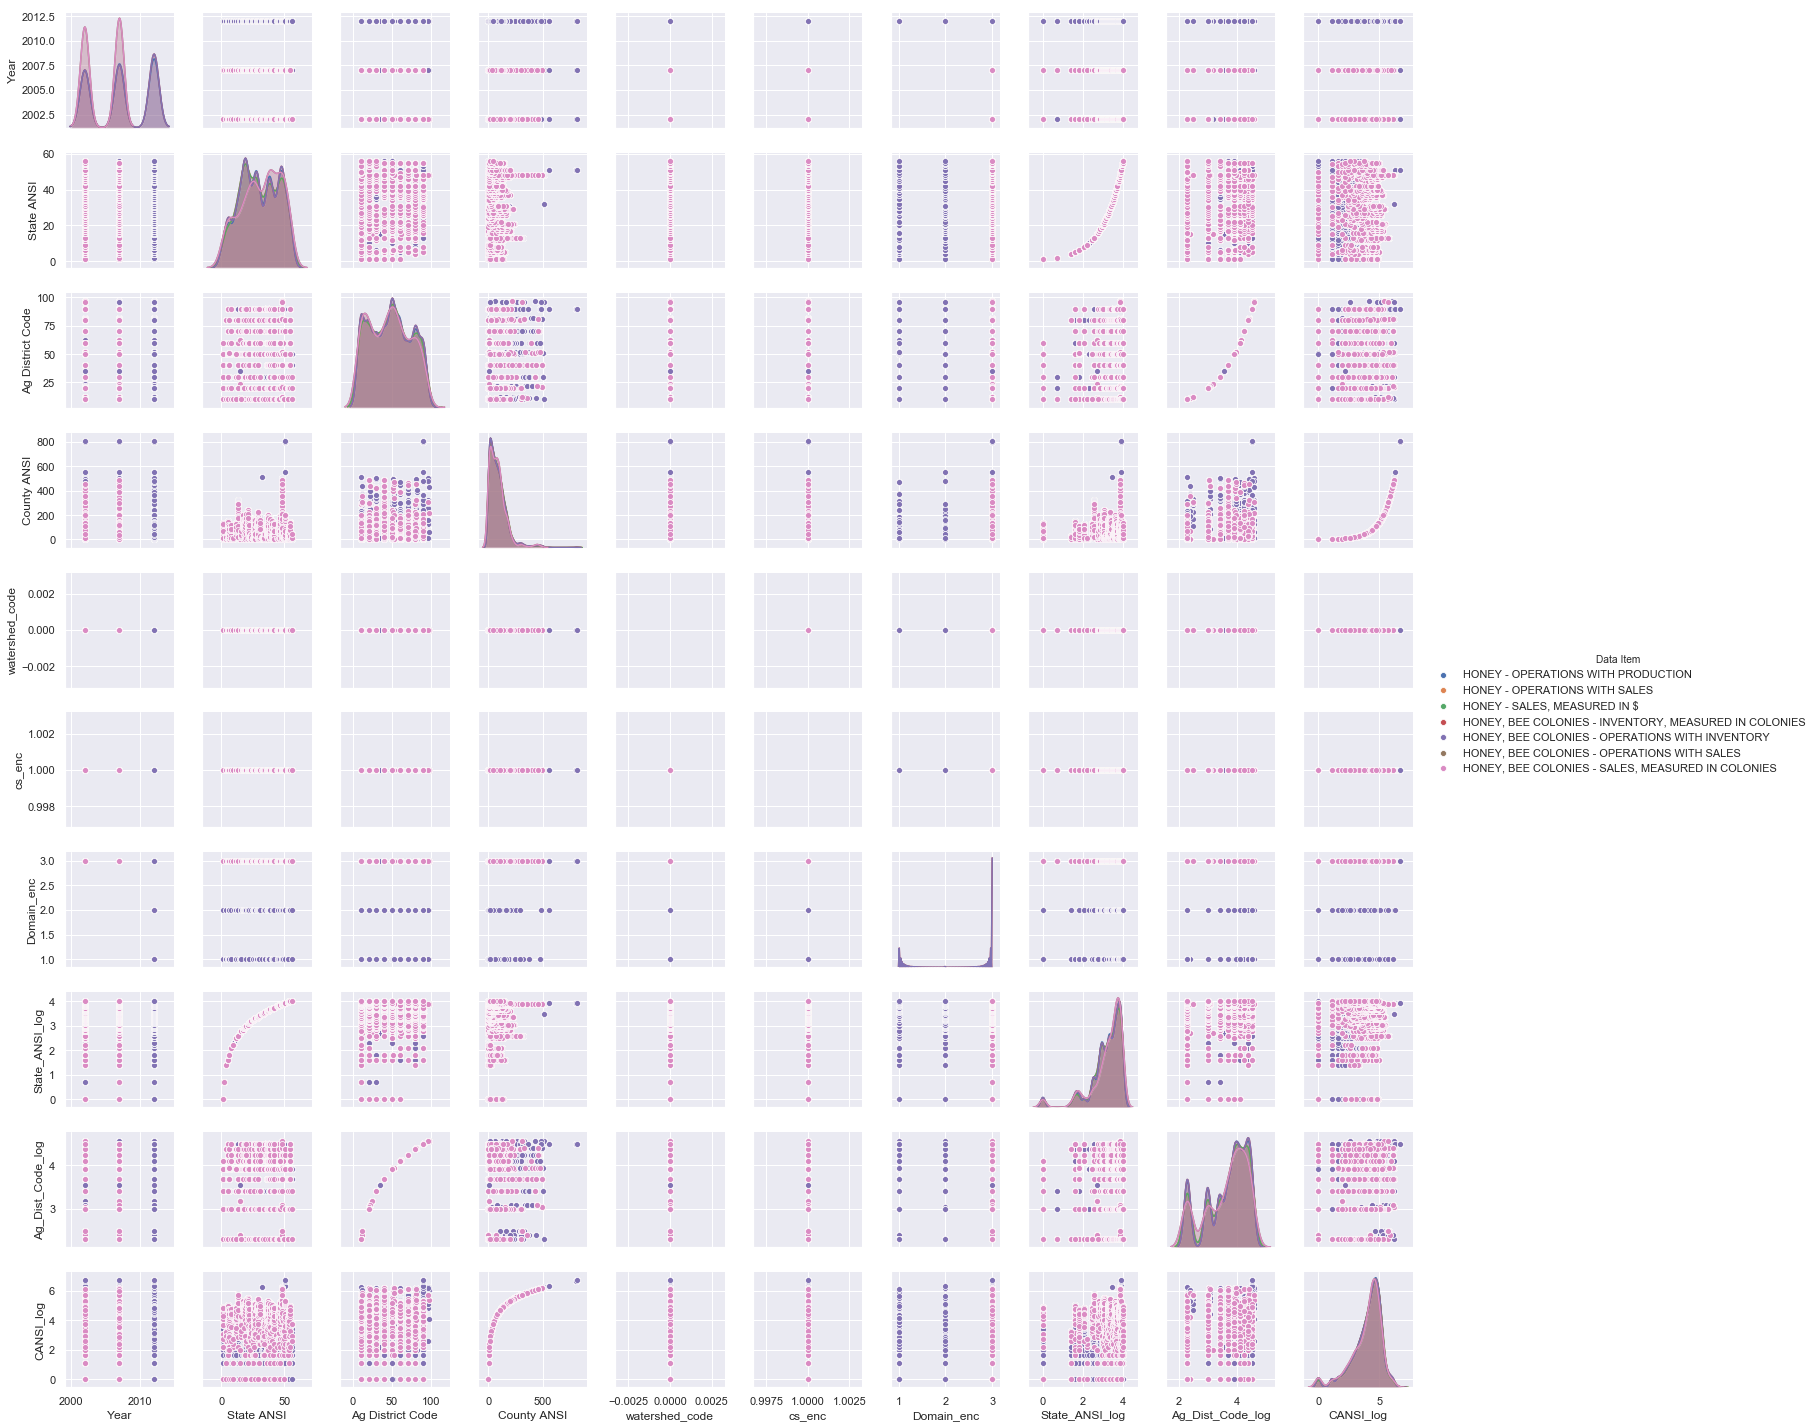

In [90]:
# vizualize the dimensionality of the data using pairplot
sns.pairplot(honey_subset_no_missing, hue='Data Item', size=2.0)

# Standardizing the Data


In [59]:
# Check the variance of the data
print(honey_df.var())

Year                  39.876983
Week Ending                 NaN
State ANSI           232.062794
Ag District Code     657.688951
County ANSI         6684.426294
Zip Code                    NaN
Region                      NaN
watershed_code         0.000000
Watershed                   NaN
cs_enc                 0.214378
Domain_enc             0.065167
dtype: float64


In [60]:
# Check the variance of the dropped data 
print(honey_drop.var())

Year                  39.876983
State ANSI           232.062794
Ag District Code     657.688951
County ANSI         6684.426294
watershed_code         0.000000
cs_enc                 0.214378
Domain_enc             0.065167
dtype: float64


In [61]:
# Import Train/Test Split + Fit/Predict/Accuracy classification tools
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier()

In [62]:
# drop NaN values from the 'State ANSI' column before stratified sampling
sansi_cln = honey_drop['State ANSI'].dropna()
print(sansi_cln.shape)
print(honey_drop.shape)
sansi_cln.describe()


(44952,)
(45703, 19)


count    44952.000000
mean        30.157234
std         15.233607
min          1.000000
25%         18.000000
50%         29.000000
75%         42.000000
max         56.000000
Name: State ANSI, dtype: float64

In [86]:
# Create a data with all columns except 'State ANSI'
sansi_X = honey_subset_no_missing.drop('State ANSI', axis=1)

# Create a 'State ANSI' labels dataset
sansi_y = honey_subset_no_missing[['State ANSI']]

# Use stratified sampling to split up the dataset according to the sansi_y dataset
X_train, X_test, y_train, y_test = train_test_split(sansi_X, sansi_y, stratify=sansi_y)

# Print out the category_desc counts on the training y labels
print(y_train['State ANSI'].value_counts())
print('\n', y_train.head())
sansi_y(fe_data)

48.0    1396
13.0     993
21.0     969
29.0     915
37.0     837
39.0     811
47.0     807
51.0     799
19.0     771
17.0     738
26.0     716
18.0     712
27.0     693
12.0     623
55.0     610
42.0     604
6.0      604
5.0      552
28.0     538
1.0      537
20.0     510
36.0     497
40.0     489
54.0     486
31.0     478
22.0     401
46.0     398
45.0     374
8.0      371
30.0     367
38.0     354
53.0     353
41.0     308
16.0     308
35.0     210
24.0     206
49.0     202
34.0     179
23.0     150
56.0     149
4.0      134
50.0     129
25.0     123
33.0      92
32.0      89
9.0       77
15.0      44
44.0      40
2.0       26
10.0      26
Name: State ANSI, dtype: int64

        State ANSI
14428        12.0
20663        36.0
7133         54.0
27739        20.0
8300          8.0


TypeError: 'DataFrame' object is not callable

In [105]:
# investigate the columns of interest
print('\n Data Item Column')
print(honey_subset_no_missing[['Data Item']].describe())  


 Data Item Column
                                              Data Item
count                                             30394
unique                                                7
top     HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY
freq                                               8167


In [87]:
# investigate the columns of interest
print('\n Value Column')
print(honey_subset_no_missing[['Value']].describe()) 


 Value Column
        Value
count   30394
unique   1704
top       (D)
freq     4332


In [65]:
# reminder of the variances from before cleaning
print(honey_drop.var())

# Apply the log normalization function to the State ANSI, Ag District Code and County ANSI columns
honey_df['State_ANSI_log'] = np.log(honey_df['State ANSI'])
honey_df['Ag_Dist_Code_log'] = np.log(honey_df['Ag District Code'])
honey_df['CANSI_log'] = np.log(honey_df['County ANSI'])


# Check the variance of the columns again
print(honey_df['State_ANSI_log'].var())
print(honey_df['Ag_Dist_Code_log'].var())
print(honey_df['CANSI_log'].var())

Year                  39.876983
State ANSI           232.062794
Ag District Code     657.688951
County ANSI         6684.426294
watershed_code         0.000000
cs_enc                 0.214378
Domain_enc             0.065167
dtype: float64
0.6364524975968708
0.4839118243552205
1.3440957842382475


In [66]:
# now the variances after cleaning
print(honey_subset_no_missing.var())

# Apply the log normalization function to the State ANSI, Ag District Code and County ANSI columns
honey_subset_no_missing['State_ANSI_log'] = np.log(honey_subset_no_missing['State ANSI'])
honey_subset_no_missing['Ag_Dist_Code_log'] = np.log(honey_subset_no_missing['Ag District Code'])
honey_subset_no_missing['CANSI_log'] = np.log(honey_subset_no_missing['County ANSI'])


# Check the variance of the columns again
print(honey_subset_no_missing['State_ANSI_log'].var())
print(honey_subset_no_missing['Ag_Dist_Code_log'].var())
print(honey_subset_no_missing['CANSI_log'].var())

honey_subset_no_missing.shape

Year                  16.937728
State ANSI           227.505930
Ag District Code     657.688951
County ANSI         6684.426294
watershed_code         0.000000
cs_enc                 0.000000
Domain_enc             0.059254
dtype: float64
0.6215499608070967
0.4839118243552205
1.3440957842382475


(30394, 22)

In [67]:
honey_subset_no_missing

,Program,Year,Period,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,...,Data Item,Domain,Domain Category,Value,CV (%),cs_enc,Domain_enc,State_ANSI_log,Ag_Dist_Code_log,CANSI_log
0,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,1.0,...,HONEY - OPERATIONS WITH PRODUCTION,TOTAL,NOT SPECIFIED,6,33.8,1,3,0.000000,3.688879,0.000000
1,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,1.0,...,HONEY - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,5,32.9,1,3,0.000000,3.688879,0.000000
2,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,1.0,...,"HONEY - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"15,000",13.6,1,3,0.000000,3.688879,0.000000
3,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,ELMORE,51.0,...,HONEY - OPERATIONS WITH PRODUCTION,TOTAL,NOT SPECIFIED,15,33.8,1,3,0.000000,3.688879,3.931826
4,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,ELMORE,51.0,...,HONEY - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,13,32.9,1,3,0.000000,3.688879,3.931826
5,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,ELMORE,51.0,...,"HONEY - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"11,000",13.6,1,3,0.000000,3.688879,3.931826
6,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,GREENE,63.0,...,HONEY - OPERATIONS WITH PRODUCTION,TOTAL,NOT SPECIFIED,3,33.8,1,3,0.000000,3.688879,4.143135
7,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,GREENE,63.0,...,HONEY - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,3,32.9,1,3,0.000000,3.688879,4.143135
8,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,GREENE,63.0,...,"HONEY - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,(Z),13.6,1,3,0.000000,3.688879,4.143135
9,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,LOWNDES,85.0,...,HONEY - OPERATIONS WITH PRODUCTION,TOTAL,NOT SPECIFIED,2,33.8,1,3,0.000000,3.688879,4.442651


In [68]:
# look at accuracy of k-nearest neighbors (knn) model on the set using the normalized Year

# Create a data with all columns except 'Year'
yr_X = honey_subset_no_missing.drop('Year', axis=1)

# Create a 'Year' labels dataset
yr_y = honey_subset_no_missing[['Year']]

# Use stratified sampling to split up the dataset according to the yr_y dataset
X_train, X_test, y_train, y_test = train_test_split(yr_X, yr_y, stratify=yr_y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))


# Print out the category_desc counts on the training y labels
print(y_train['Year'].value_counts())
print('\n', y_train.head())

ValueError: could not convert string to float: 'CENSUS'

# Feature Engineering - from sklearn

In [106]:
# Repeat the label encoding on the Data Item column, as done before with the Domain column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dait_labels = le.fit_transform(honey_subset_no_missing['Data Item'])
dait_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
dait_mappings



{0: 'HONEY - OPERATIONS WITH PRODUCTION',
 1: 'HONEY - OPERATIONS WITH SALES',
 2: 'HONEY - SALES, MEASURED IN $',
 3: 'HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES',
 4: 'HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY',
 5: 'HONEY, BEE COLONIES - OPERATIONS WITH SALES',
 6: 'HONEY, BEE COLONIES - SALES, MEASURED IN COLONIES'}

In [107]:
# Add the encoded column to the DataFrame 
honey_subset_no_missing['DataItemLabel'] = dait_labels
honey_subset_no_missing.head()

,Program,Year,Period,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,...,Domain,Domain Category,Value,CV (%),cs_enc,Domain_enc,State_ANSI_log,Ag_Dist_Code_log,CANSI_log,DataItemLabel
0,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,1.0,...,TOTAL,NOT SPECIFIED,6,33.8,1,3,0.0,3.688879,0.000000,0
1,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,1.0,...,TOTAL,NOT SPECIFIED,5,32.9,1,3,0.0,3.688879,0.000000,1
2,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,AUTAUGA,1.0,...,TOTAL,NOT SPECIFIED,"15,000",13.6,1,3,0.0,3.688879,0.000000,2
3,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,ELMORE,51.0,...,TOTAL,NOT SPECIFIED,15,33.8,1,3,0.0,3.688879,3.931826,0
4,CENSUS,2012,YEAR,COUNTY,ALABAMA,1.0,BLACK BELT,40.0,ELMORE,51.0,...,TOTAL,NOT SPECIFIED,13,32.9,1,3,0.0,3.688879,3.931826,1


In [69]:
# pull features from above cleaned data to use for feature engineering
fe_data = honey_subset_no_missing.take([1,12,17,18,19,20], axis=1)
print(fe_data.head())
print(fe_data.describe())

   Year                           Data Item  cs_enc  Domain_enc  \
0  2012  HONEY - OPERATIONS WITH PRODUCTION       1           3   
1  2012       HONEY - OPERATIONS WITH SALES       1           3   
2  2012        HONEY - SALES, MEASURED IN $       1           3   
3  2012  HONEY - OPERATIONS WITH PRODUCTION       1           3   
4  2012       HONEY - OPERATIONS WITH SALES       1           3   

   State_ANSI_log  Ag_Dist_Code_log  
0             0.0          3.688879  
1             0.0          3.688879  
2             0.0          3.688879  
3             0.0          3.688879  
4             0.0          3.688879  
               Year   cs_enc    Domain_enc  State_ANSI_log  Ag_Dist_Code_log
count  30394.000000  30394.0  30394.000000    30394.000000      30394.000000
mean    2007.935711      1.0      2.965059        3.201787          3.678845
std        4.115547      0.0      0.243420        0.788384          0.695638
min     2002.000000      1.0      1.000000        0.000000   

In [70]:
# Text features from the 'Data Item' column
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_d = vec.fit_transform(fe_data['Data Item'])
X_d

<30394x10 sparse matrix of type '<class 'numpy.int64'>'
	with 158360 stored elements in Compressed Sparse Row format>

In [71]:
# convert to a DataFrame with labeled columns
pd.DataFrame(X_d.toarray(), columns=vec.get_feature_names())


,bee,colonies,honey,in,inventory,measured,operations,production,sales,with
0,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,0,1,0,1,1
2,0,0,1,1,0,1,0,0,1,0
3,0,0,1,0,0,0,1,1,0,1
4,0,0,1,0,0,0,1,0,1,1
5,0,0,1,1,0,1,0,0,1,0
6,0,0,1,0,0,0,1,1,0,1
7,0,0,1,0,0,0,1,0,1,1
8,0,0,1,1,0,1,0,0,1,0
9,0,0,1,0,0,0,1,1,0,1


In [72]:
# Weight the word counts by how often they appear using term frequency-inverse document frequency (tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X_d = vec.fit_transform(fe_data['Data Item'])
pd.DataFrame(X_d.toarray(), columns=vec.get_feature_names())

,bee,colonies,honey,in,inventory,measured,operations,production,sales,with
0,0.000000,0.000000,0.295867,0.000000,0.000000,0.000000,0.438842,0.726153,0.000000,0.438842
1,0.000000,0.000000,0.294640,0.000000,0.000000,0.000000,0.437023,0.000000,0.728841,0.437023
2,0.000000,0.000000,0.259983,0.509322,0.000000,0.509322,0.000000,0.000000,0.643111,0.000000
3,0.000000,0.000000,0.295867,0.000000,0.000000,0.000000,0.438842,0.726153,0.000000,0.438842
4,0.000000,0.000000,0.294640,0.000000,0.000000,0.000000,0.437023,0.000000,0.728841,0.437023
5,0.000000,0.000000,0.259983,0.509322,0.000000,0.509322,0.000000,0.000000,0.643111,0.000000
6,0.000000,0.000000,0.295867,0.000000,0.000000,0.000000,0.438842,0.726153,0.000000,0.438842
7,0.000000,0.000000,0.294640,0.000000,0.000000,0.000000,0.437023,0.000000,0.728841,0.437023
8,0.000000,0.000000,0.259983,0.509322,0.000000,0.509322,0.000000,0.000000,0.643111,0.000000
9,0.000000,0.000000,0.295867,0.000000,0.000000,0.000000,0.438842,0.726153,0.000000,0.438842


In [ ]:
# I'm not sure what to do with the above vectorized data from the Data Item column?

In [73]:
# pull features from above cleaned data ** WITHOUT 'Data Item' column ** to use for feature engineering
fe2_data = honey_subset_no_missing.take([1,17,18,19,20], axis=1)

print(fe2_data.shape)
print(fe2_data.head())
print(fe2_data.describe())

f2_drop = fe2_data.dropna()
f2_drop

(30394, 5)
   Year  cs_enc  Domain_enc  State_ANSI_log  Ag_Dist_Code_log
0  2012       1           3             0.0          3.688879
1  2012       1           3             0.0          3.688879
2  2012       1           3             0.0          3.688879
3  2012       1           3             0.0          3.688879
4  2012       1           3             0.0          3.688879
               Year   cs_enc    Domain_enc  State_ANSI_log  Ag_Dist_Code_log
count  30394.000000  30394.0  30394.000000    30394.000000      30394.000000
mean    2007.935711      1.0      2.965059        3.201787          3.678845
std        4.115547      0.0      0.243420        0.788384          0.695638
min     2002.000000      1.0      1.000000        0.000000          2.302585
25%     2002.000000      1.0      3.000000        2.890372          3.401197
50%     2007.000000      1.0      3.000000        3.367296          3.912023
75%     2012.000000      1.0      3.000000        3.806662          4.248495
m

,Year,cs_enc,Domain_enc,State_ANSI_log,Ag_Dist_Code_log
0,2012,1,3,0.000000,3.688879
1,2012,1,3,0.000000,3.688879
2,2012,1,3,0.000000,3.688879
3,2012,1,3,0.000000,3.688879
4,2012,1,3,0.000000,3.688879
5,2012,1,3,0.000000,3.688879
6,2012,1,3,0.000000,3.688879
7,2012,1,3,0.000000,3.688879
8,2012,1,3,0.000000,3.688879
9,2012,1,3,0.000000,3.688879


In [97]:
# f2d_cd is the numpy.ndarray for the Years represented throughout the f2_drop DataFrame.
f2d_cd = f2_drop['Year'].unique()
print(f2d_cd)
print(f2d_cd.shape)

[2012 2007 2002]
(3,)


# Reminders of what Machine Learning can do for the iris dataset
### borrowed from Jake VanderPlas Ch. 5 on Hyperparameters and Model Validation
#I'm just re-typing this as a guide for my applications

In [74]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

Xi = iris.data
yi = iris.target

print(iris) 

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [75]:
print(Xi.shape)
print(yi.shape)

(150, 4)
(150,)


In [76]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(Xi, yi)
yi_model = model.predict(Xi)

from sklearn.metrics import accuracy_score
accuracy_score(yi, yi_model)

1.0

In [77]:
# make holdout sets for training
Xi1, Xi2, yi1, yi2 = train_test_split(Xi, yi, random_state=0, train_size=0.65)

#fit the model
model.fit(Xi1, yi1)

# evaluate the model on the other set
yi2_model = model.predict(Xi2)
accuracy_score(yi2, yi2_model)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9622641509433962

In [78]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, Xi, yi, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

# Support Vector Machines : Kernal SVM

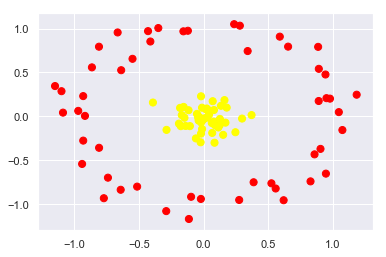

In [79]:
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC #'Support Vector Classifier'
X3, y3 = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X3,y3)

plt.scatter(X3[:,0], X3[:,1], c=y3, s=50, cmap='autumn')
model = SVC(kernel='linear', C=1E10)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)
    
plot_svc_decision_function(clf, plot_support=False);

In [80]:
r = np.exp(-(X3 ** 2).sum(1))
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X3=X3, y3=y3):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X3[:,0], X3[:,1], r, c=y3, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y3')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,90], azip=(-180, 180),
        X3=fixed(X3), y3=fixed(y3));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [91]:
# reminders about sns plotting with examples from Jake VanderPlas
tips = sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


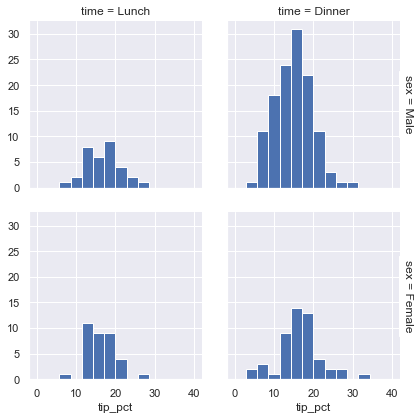

In [95]:
tips['tip_pct'] = 100* tips['tip']/tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0,40,15))

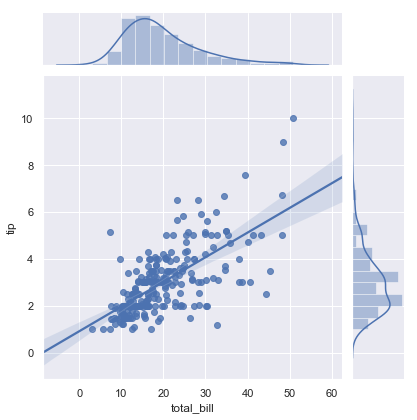

In [96]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

# Dimensionality Reduction

In [81]:
# Try an unsupervised learning technique (Principal Component Analysis) to see, by component, the variance of the components that explains the majority of the data

from sklearn.decomposition import PCA

pca = PCA()
f2_drop_pca = pca.fit_transform(f2_drop)

print(f2_drop_pca)

[[-4.07358827e+00  3.15518771e+00 -4.48466154e-01 -1.44060055e-01
  -5.17921189e-17]
 [-4.07358827e+00  3.15518771e+00 -4.48466154e-01 -1.44060055e-01
   8.33290835e-15]
 [-4.07358827e+00  3.15518771e+00 -4.48466154e-01 -1.44060055e-01
  -4.82810480e-18]
 ...
 [ 5.93843772e+00 -7.59214418e-01  3.82877545e-01  3.44798445e-02
   1.55680687e-18]
 [ 5.93843772e+00 -7.59214418e-01  3.82877545e-01  3.44798445e-02
   1.55680687e-18]
 [ 5.93843772e+00 -7.59214418e-01  3.82877545e-01  3.44798445e-02
   1.55680687e-18]]


In [82]:
# Try again using the fe_data look at accuracy of k-nearest neighbors (knn) model on the set using the normalized Year

# Create a data with all columns except 'Year'
yr_X = f2_drop.drop('Year', axis=1)

# Create a 'Year' labels dataset
yr_y = f2_drop[['Year']]

# Use stratified sampling to split up the dataset according to the yr_y dataset
X_train, X_test, y_train, y_test = train_test_split(yr_X, yr_y, stratify=yr_y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))


# Print out the category_desc counts on the training y labels
print(y_train['Year'].value_counts())
print('\n', y_train.head())

0.35373075404658505
2012    10254
2007     6553
2002     5988
Name: Year, dtype: int64

        Year
3241   2012
4286   2012
5532   2012
15129  2007
29753  2002


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


In [83]:
# attempt to fix the above error using the suggested np.ravel()
print(f2_drop.shape())


TypeError: 'tuple' object is not callable